In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from copy import deepcopy
from factorio.recipe_graph import *
from factorio.types.crafting_environment import CraftingEnvironment, FINAL_ENVIRONMENT
from factorio.types.production_unit import assembling_machine_2, furnace_2
from factorio.types.inserter_unit import inserter_fast
from factorio.types.transport_belt import transport_belt_2

In [3]:
environment = CraftingEnvironment(
    ['electronic-circuit', 'advanced-circuit', 'copper-plate', 'iron-plate', 'steel-plate'],
    assembling_machine_2,
    furnace_2,
    inserter_fast,
    transport_belt_2
)

In [60]:
materials = get_crafting_tree(Material('processing-unit', 1), FINAL_ENVIRONMENT).get_source_materials() * 200
materials

Materials copper-ore: 6628.5714285714275; iron-ore: 3657.142857142857; coal: 250.0; petroleum-gas: 14000.0; water: 72500.0

In [ ]:
tree = get_crafting_tree(Material('advanced-circuit', 1), environment)
graph = build_crafting_tree_graph(tree)
graph

In [ ]:
total_producers = 0
for step in tree.iterate_all_steps():
    if not step.is_source_step():
        total_producers += step.config.producers_amount
total_producers

In [ ]:
build_recipe_graph(Material('assembling-machine-1', 1), environment)

In [ ]:
# print(get_basic_materials(Material('logistic-robot', 1), crafting_environment))
graph = build_recipe_graph(Material('logistic-robot', 1/60), environment)
graph

In [ ]:
build_recipe_graph(Material('flying-robot-frame', 1/5), environment)

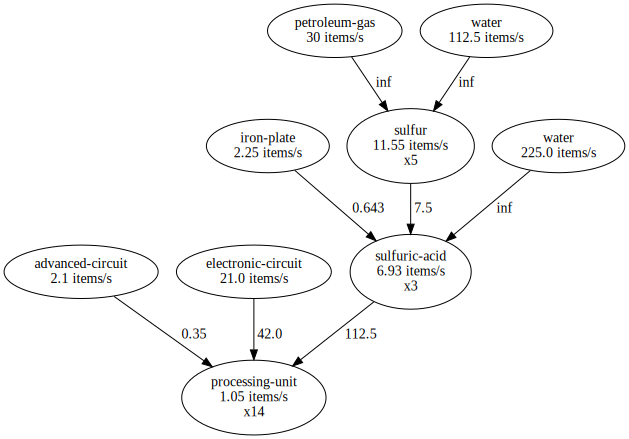

In [5]:
build_recipe_graph(Material('processing-unit', 1), environment)

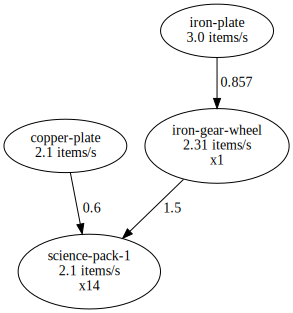

In [21]:
build_recipe_graph(Material("science-pack-1", 2), environment)

Materials electronic-circuit: 3.0; iron-plate: 13.5


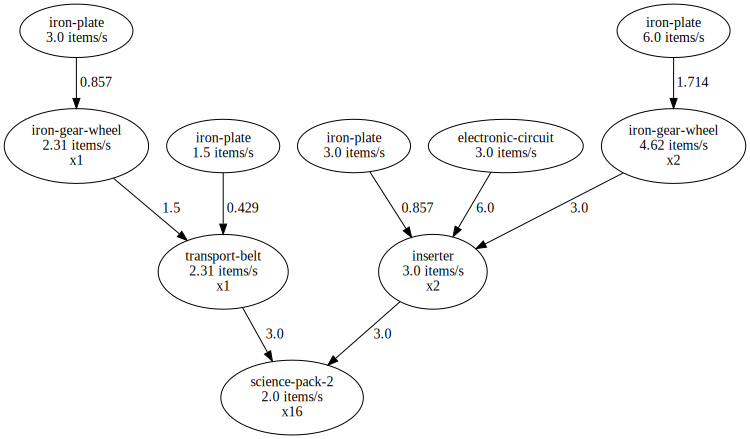

In [14]:
print(get_crafting_tree(Material("science-pack-2", 2), environment).get_source_materials())
build_recipe_graph(Material("science-pack-2", 2), environment)

Materials advanced-circuit: 3.0; petroleum-gas: 22.5; water: 22.5; iron-plate: 7.5; steel-plate: 2.025


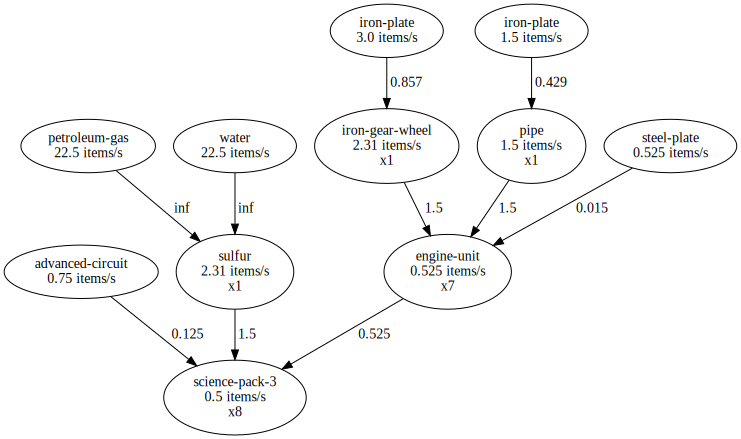

In [17]:
print(get_crafting_tree(Material("science-pack-3", 2), environment).get_source_materials())
build_recipe_graph(Material("science-pack-3", 1/2), environment)

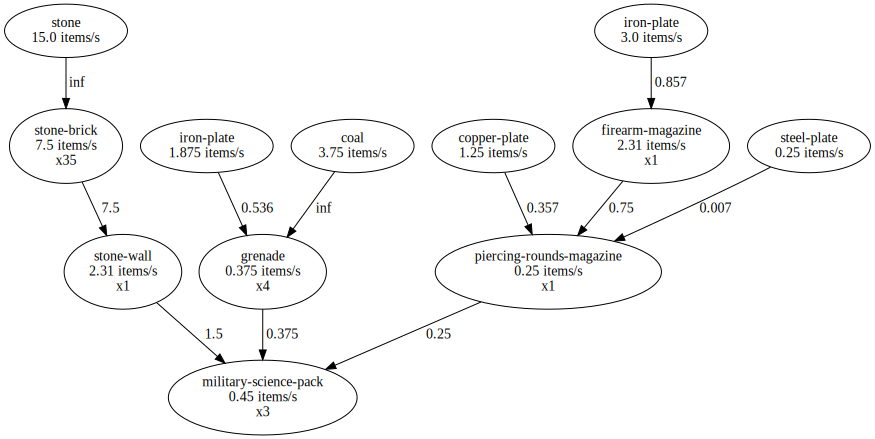

In [47]:
local = deepcopy(environment)
local.add_constraint_producers_amount("military-science-pack", 6)
local.add_constraint_producers_amount("grenade", 4)
build_recipe_graph("military-science-pack", local)

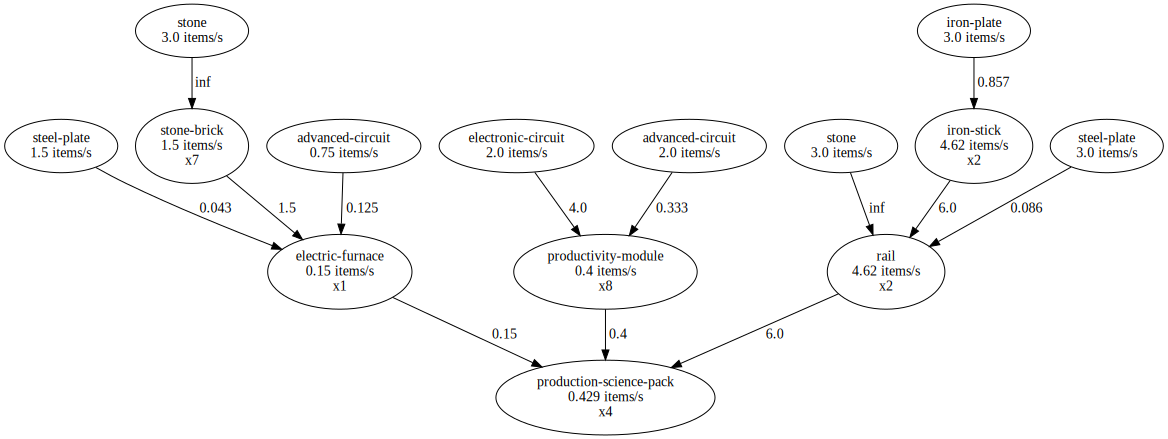

In [6]:
local = deepcopy(environment)
local.add_constraint_material_rate(Material("production-science-pack", 1))
local.add_constraint_producers_amount("productivity-module", 8)
build_recipe_graph("production-science-pack", local)

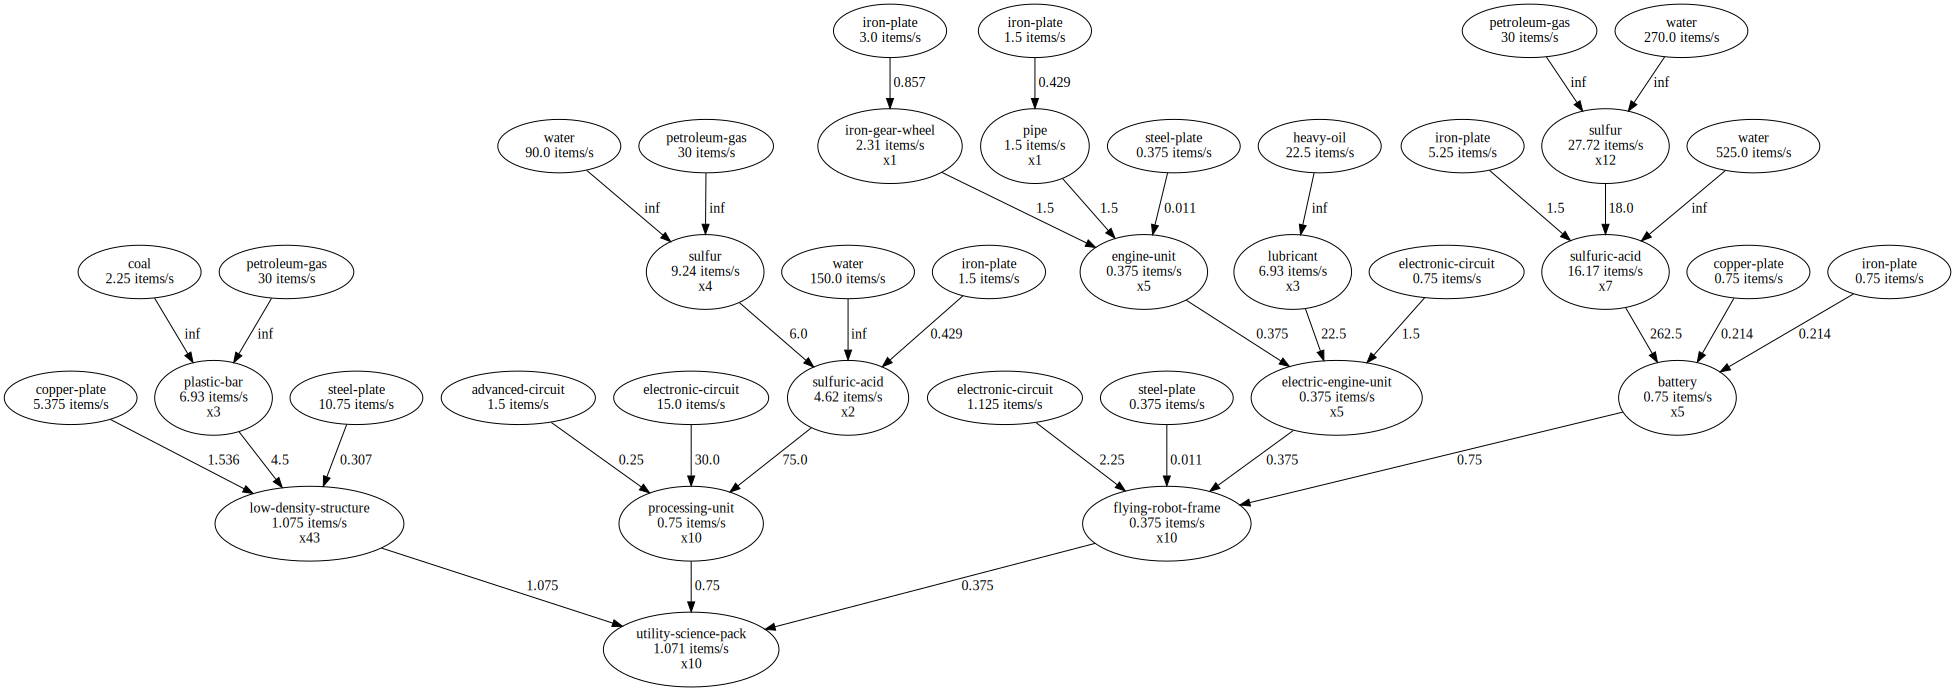

In [4]:
local = deepcopy(environment)
local.add_constraint_material_rate(Material("utility-science-pack", 1))
build_recipe_graph("utility-science-pack", local)

WARNING! production config cannot support ingredient rate = 10000.0 for output


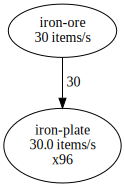

In [17]:
local = deepcopy(environment)
local.remove_final_recipe("iron-plate")
local.furnace_type = furnace_1
build_recipe_graph(Material("iron-plate", 10000), local)

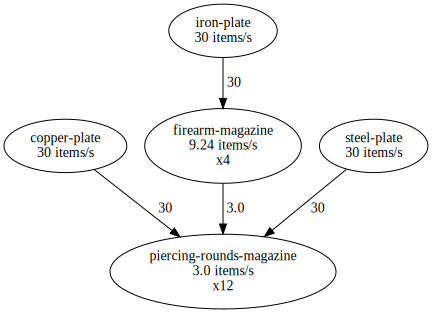

In [18]:
local = deepcopy(environment)
local.add_constraint_producers_amount("firearm-magazine", 3)
build_recipe_graph(Material("piercing-rounds-magazine"), local)

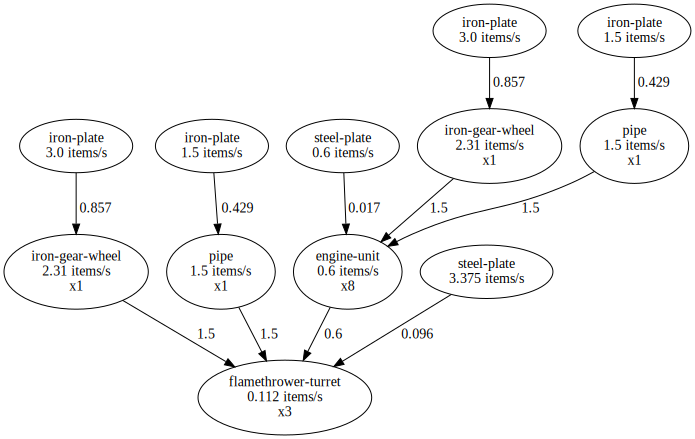

In [44]:
local = deepcopy(environment)
local.add_constraint_producers_amount("flamethrower-turret", 3)
build_recipe_graph("flamethrower-turret", local)

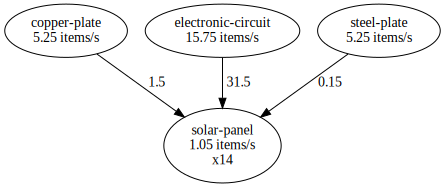

In [37]:
build_recipe_graph(Material("solar-panel", 1), environment)

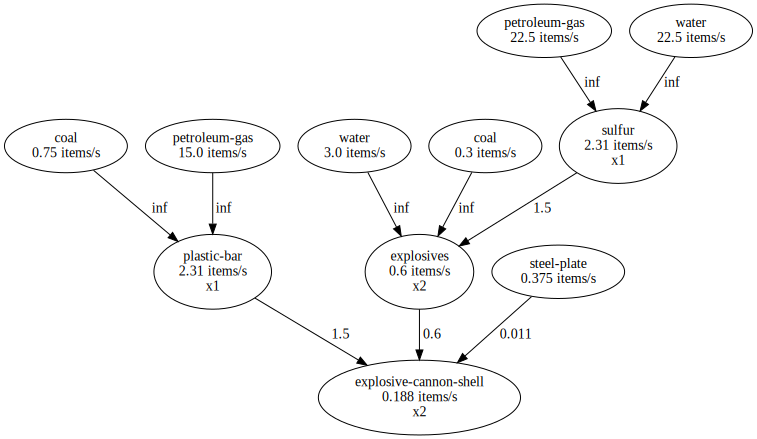

In [43]:
build_recipe_graph(Material("explosive-cannon-shell", 1/10), local)

In [ ]:
env_copy = deepcopy(environment)
env_copy.add_constraint_producers_amount("advanced-oil-processing", 3)
build_recipe_graph('rocket-fuel', env_copy)

In [ ]:
get_recipe_step = lambda name: CraftingStep(environment.get_production_config(recipes_info[name]))
coal_liquefaction = get_recipe_step("coal-liquefaction")
heavy_oil_cracking = get_recipe_step("heavy-oil-cracking")
solid_fuel = get_recipe_step("solid-fuel")
coal_liquefaction.set_next_step(heavy_oil_cracking)
heavy_oil_cracking.set_next_step(solid_fuel)

In [ ]:
environment.get_production_config(recipes_info["solid-fuel"])

In [ ]:
recipes_info["solid-fuel"]

In [ ]:
build_crafting_tree_graph(solid_fuel)

In [ ]:
recipes_info['flying-robot-frame'].get_required()

In [ ]:
get_basic_materials(Material('electronic-circuit', 90))

In [ ]:
from factorio.types.transport_belt import transport_belt_2
get_basic_materials(transport_belt_2 * 10, environment)

Build mall tree

In [ ]:
from factorio.additional_configurations import config_infinite_input_output

mall_root_step = CraftingStep(config_infinite_input_output)
mall_environment = crafting_environment

mall_items_list = [
    "inserter",
    "assembling-machine-1",
    "long-handed-inserter",
    "transport-belt",
    "fast-transport-belt",
    "",
    "pipe",
    "pipe-to-ground",
    "underground-belt",
    "splitter",
]

for mall_item_id in mall_items_list:
    if mall_item_id not in recipes_info:
        print(f'cannot find "{mall_item_id}"')
        continue
    crafting_tree = get_crafting_tree(Material(mall_item_id, 1), mall_environment)
    mall_root_step.previous_steps.append(crafting_tree)

In [ ]:
mall_graph = build_crafting_tree_graph(mall_root_step)
mall_graph

In [ ]:
mall_graph.render("basic_mall", 'graph', format='png')

In [ ]:
total_materials = MaterialCollection()
for step in mall_root_step.iterate_all_steps():
    if step.is_source_step():
        total_materials += step.config.get_results()
total_materials

In [ ]:
component = "electronic-circuit"

for node in mall_root_step.iterate_all_steps():
    if node.get_results().first().id == component:
        if node.next_step is None: continue
        print(node.next_step)
        print()

In [ ]:
for 

In [ ]:
print(mall_graph.node("89"))

In [ ]:
science_root = CraftingStep(config_infinite_input_output)
science_items = [
    "science-pack-1",
    "science-pack-2",
    "science-pack-3",
]
for item in science_items:
    science_root.previous_steps.append(get_crafting_tree(Material(item, 1), crafting_environment))
science_graph = get_crafting_graph(science_root)
science_graph

In [ ]:
build_recipe_graph(Material("rail"), crafting_environment)

In [ ]:
recipes_info["iron-stick"]